<a href="https://colab.research.google.com/github/meghanajhanwer/Complete-Data-Science-With-Machine-Learning-And-NLP-2024/blob/main/ID_001426187.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 1801 - Coursework

In this File there are two regression models and two classification models.

Data Exploration-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   HeatTreatTime   1000 non-null   float64
 7   Nickel%         1000 non-null   float64
 8   Iron%           1000 non-null   float64
 9   Cobalt%         1000 non-null   float64
 10  Chromium%       1000 non-null   float64
 11  smallDefects    1000 non-null   int64  
 12  largeDefects    1000 non-null   int64  
 13  sliverDefects   1000 non-null   int64  
 14  seedLocation    1000 non-null   object 
 15  castType        1000 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 125.1+ KB
None
   Lifespan par

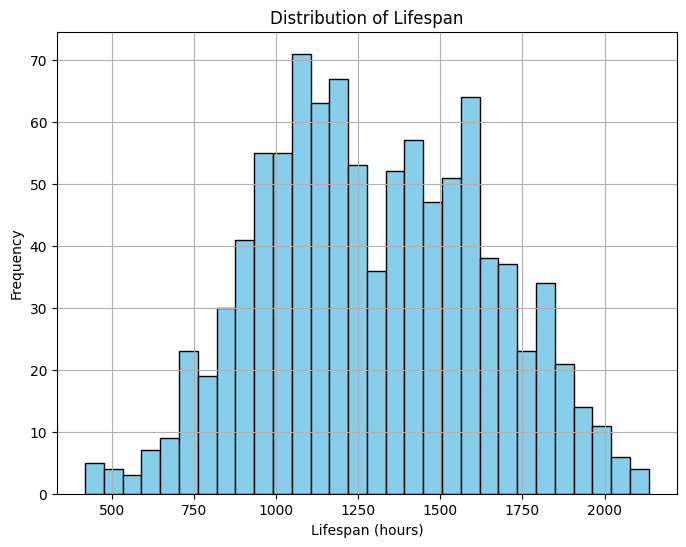

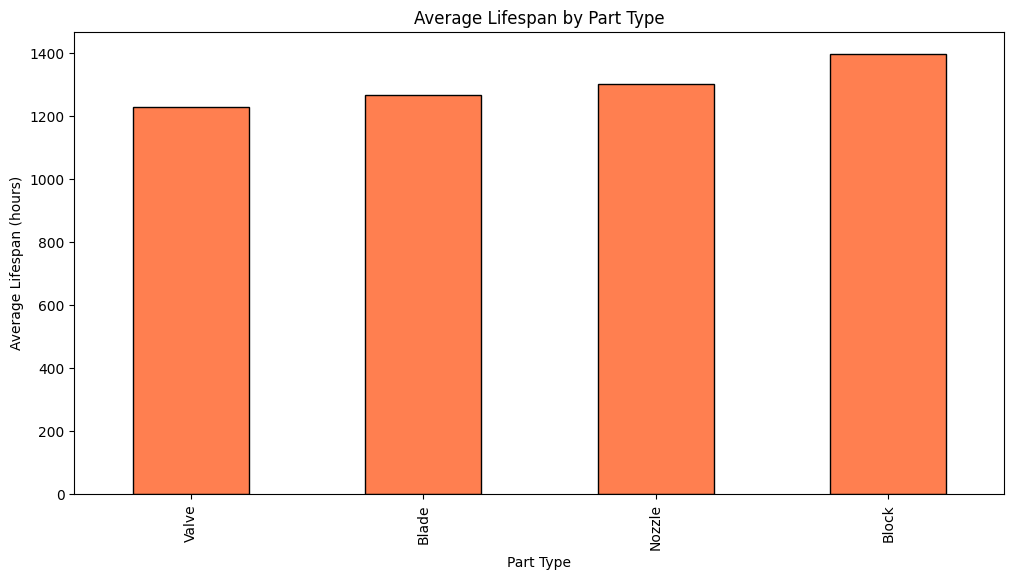

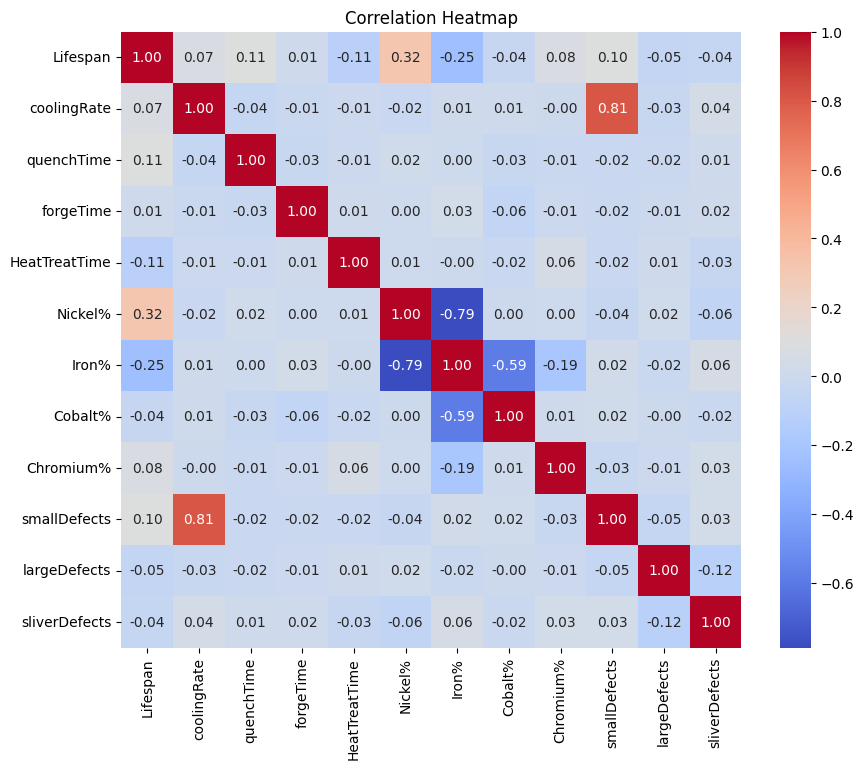

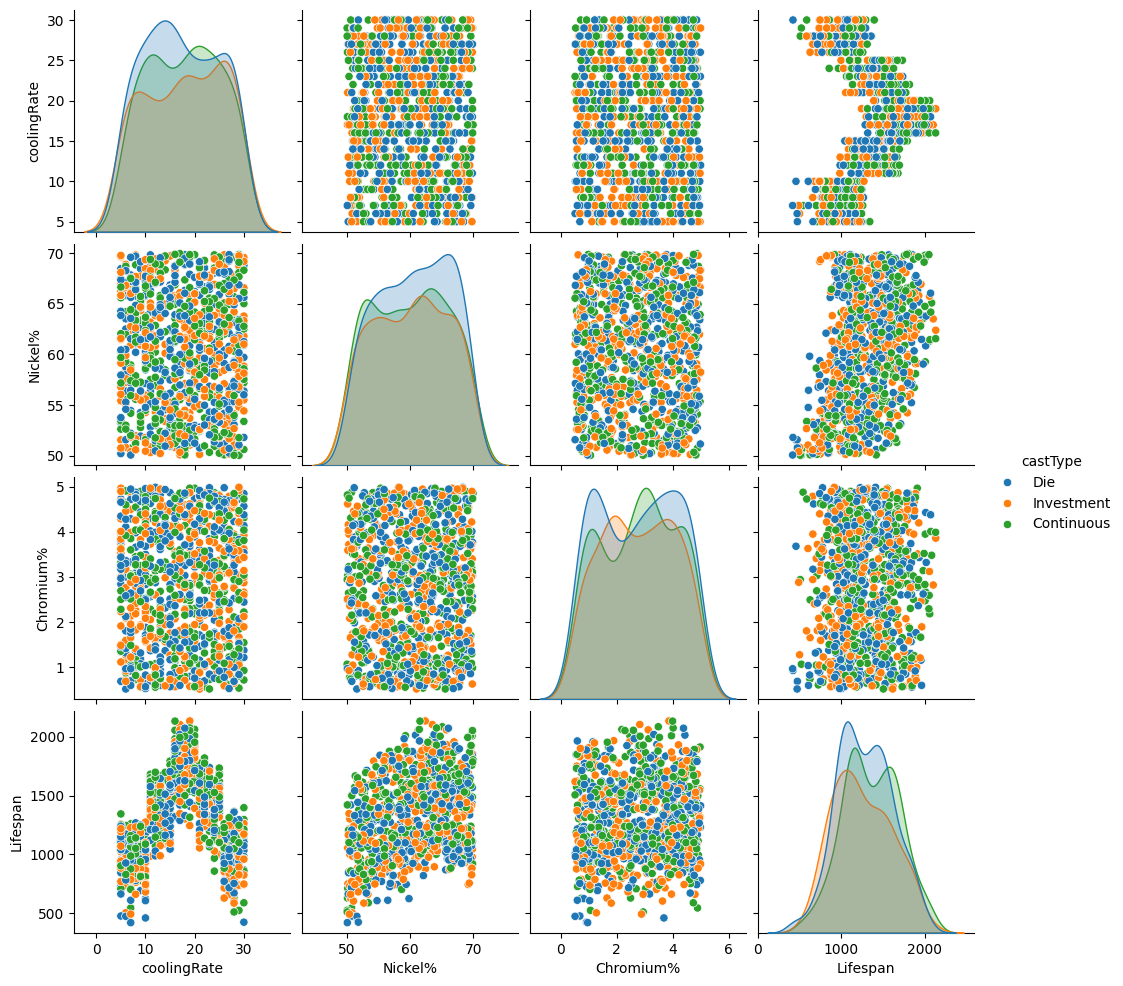

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'COMP1801_Coursework_Dataset.csv'
data = pd.read_csv(file_path)

print(data.info())
print(data.head())

plt.figure(figsize=(8, 6))
data['Lifespan'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Lifespan')
plt.xlabel('Lifespan (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
data.groupby('partType')['Lifespan'].mean().sort_values().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Lifespan by Part Type')
plt.ylabel('Average Lifespan (hours)')
plt.xlabel('Part Type')
plt.show()


numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(data, vars=['coolingRate', 'Nickel%', 'Chromium%', 'Lifespan'], hue='castType')
plt.show()


Regression Model -
Linear Regression model with Polynomial feature (Ridge Regularization)

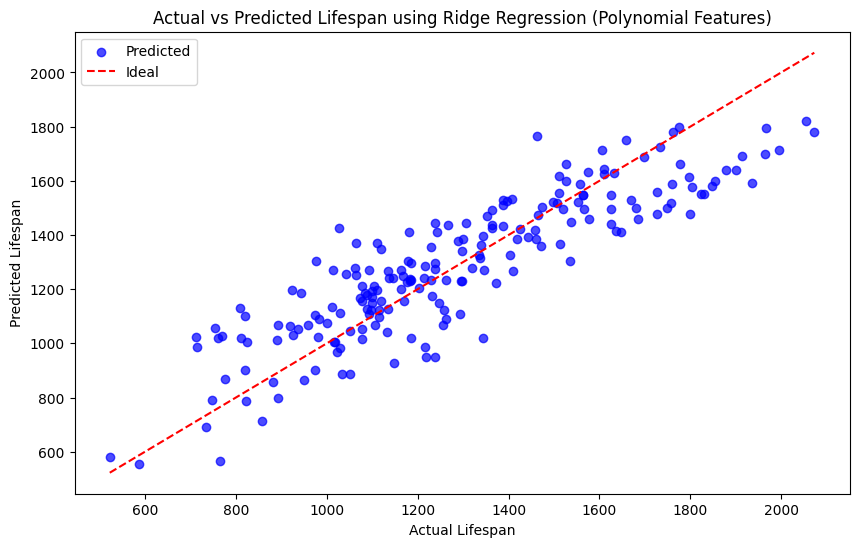

(124.60614606296426,
 155.22325791712586,
 {'poly__degree': 2, 'regressor__alpha': 100})

In [2]:
# Importing required libraries for data visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('COMP1801_Coursework_Dataset.csv')

X = data.drop(columns=['Lifespan'])
y = data['Lifespan']

# Splitting columns by data types
categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in categorical_features]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

polynomial_transformer = PolynomialFeatures()
ridge = Ridge()

linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', polynomial_transformer),
    ('regressor', ridge)
])

# Splitting data into train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Ridge with Polynomial Features
ridge_param_grid = {
    'poly__degree': [1, 2, 3],
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_search = GridSearchCV(linear_pipeline, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

best_ridge_model = ridge_search.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, color="b", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal")
plt.xlabel("Actual Lifespan")
plt.ylabel("Predicted Lifespan")
plt.title("Actual vs Predicted Lifespan using Ridge Regression (Polynomial Features)")
plt.legend()
plt.show()


ridge_mae, ridge_rmse, ridge_search.best_params_

Random forest regression -

Best Random Forest Model:
MAE: 68.41169849999997
RMSE: 85.98699498641203
Best Hyperparameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}


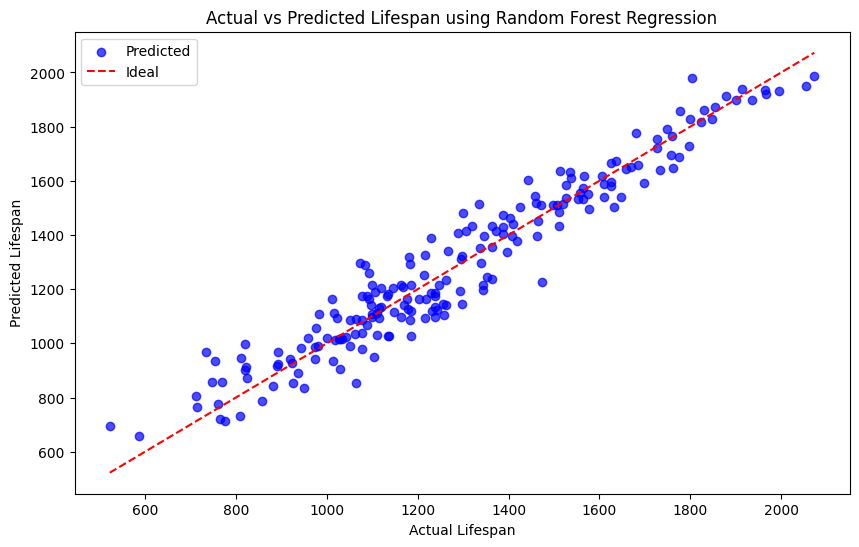

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


data = pd.read_csv('COMP1801_Coursework_Dataset.csv')

X = data.drop(columns=['Lifespan'])
y = data['Lifespan']

categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in categorical_features]

# Preprocessing pipeline for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

random_forest = RandomForestRegressor(random_state=42)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', random_forest)
])


# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest Regressor
rf_param_grid = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [10, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 5]
}
rf_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
rf_search.fit(X_train, y_train)

best_rf_model = rf_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Best Random Forest Model:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print("Best Hyperparameters:", rf_search.best_params_)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="b", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal")
plt.xlabel("Actual Lifespan")
plt.ylabel("Predicted Lifespan")
plt.title("Actual vs Predicted Lifespan using Random Forest Regression")
plt.legend()
plt.show()


Classification Models -

Before model implementaion we add a new feature lifetime above 1500 hours or not

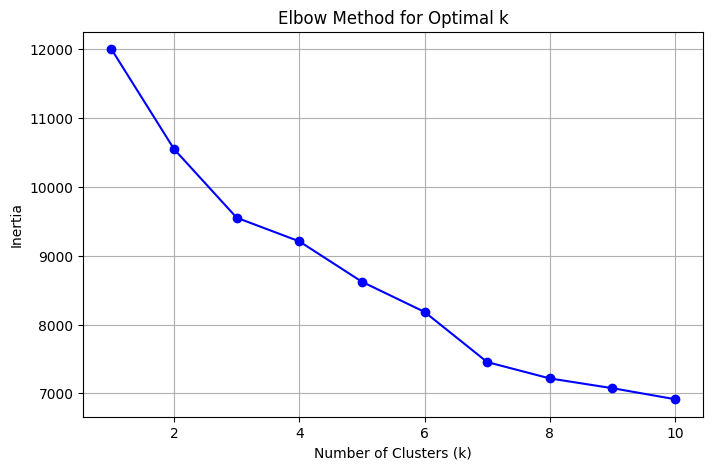

Cluster Counts: Cluster_Labels
0    331
1    343
2    326
Name: count, dtype: int64


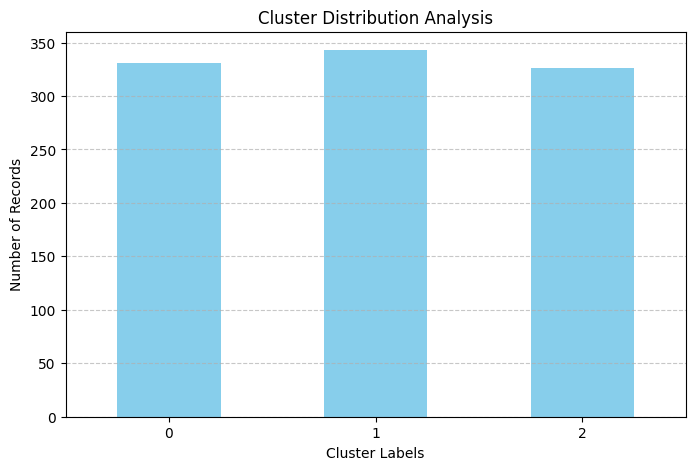


 Cluster Summary Statistics:
                   Lifespan  coolingRate  quenchTime  forgeTime  \
Cluster_Labels                                                    
0               1225.617462    22.975831    2.726798   5.486677   
1               1545.854315    20.478134    2.781953   5.440087   
2               1112.419969     9.233129    2.783589   5.467975   

                HeatTreatTime    Nickel%      Iron%    Cobalt%  Chromium%  \
Cluster_Labels                                                              
0                   31.185045  55.841208  30.581782  10.984653   2.592356   
1                   30.011516  64.889096  18.254402  13.909913   2.946589   
2                   29.381319  59.824172  25.060583  12.354816   2.760429   

                smallDefects  largeDefects  sliverDefects  
Cluster_Labels                                             
0                  25.392749      0.492447       0.471299  
1                  21.559767      0.603499       0.189504  
2       

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'COMP1801_Coursework_Dataset.csv'  # Path to your dataset
data = pd.read_csv(file_path)

data['1500_labels'] = (data['Lifespan'] > 1500).astype(int)

numerical_features = ['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime',
                      'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%',
                      'smallDefects', 'largeDefects', 'sliverDefects']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numerical_features])


inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster_Labels'] = kmeans.fit_predict(scaled_features)


cluster_counts = data['Cluster_Labels'].value_counts().sort_index()
print("Cluster Counts:", cluster_counts)

plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster Labels')
plt.ylabel('Number of Records')
plt.title('Cluster Distribution Analysis')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

cluster_summary = data.groupby('Cluster_Labels')[numerical_features].mean()


print("\n Cluster Summary Statistics:")
print(cluster_summary)

Decision Tree classification model -

Decision Tree Classifier:
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2}
Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       139
           1       0.81      0.77      0.79        61

    accuracy                           0.88       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.87      0.88      0.87       200



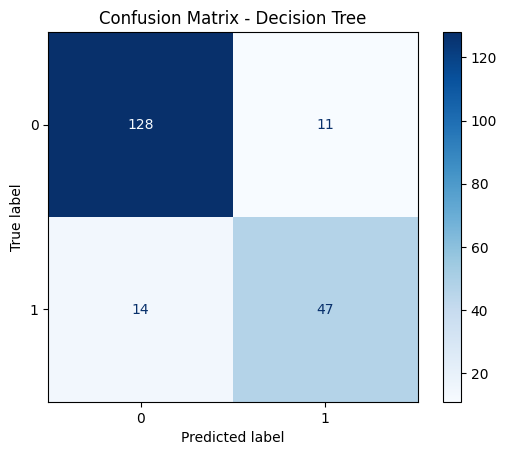

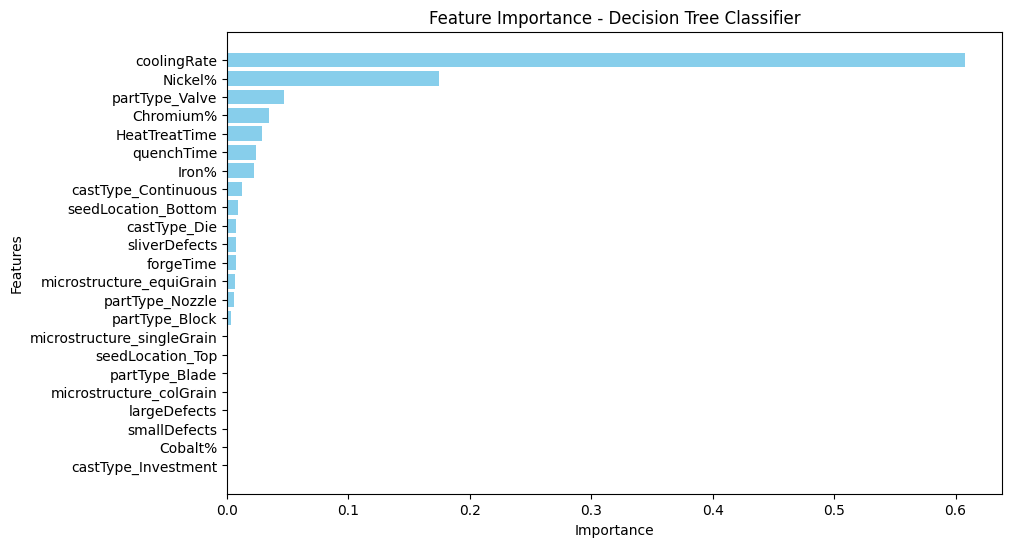

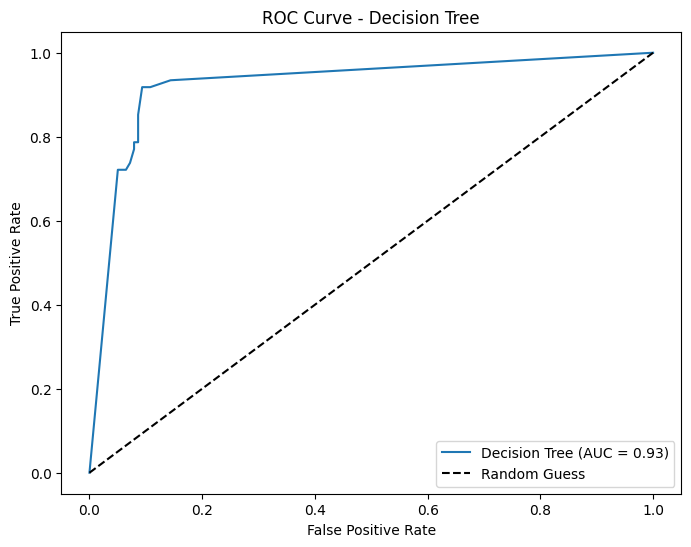

In [6]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'COMP1801_Coursework_Dataset.csv'
data = pd.read_csv(file_path)

data['1500_labels'] = (data['Lifespan'] > 1500).astype(int)


X = data.drop(columns=['Lifespan', '1500_labels'])
y = data['1500_labels']

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

decision_tree = DecisionTreeClassifier(random_state=42)

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

dt_param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(dt_pipeline, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)


best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)


print("Decision Tree Classifier:")
print("Best Parameters:", dt_grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


ConfusionMatrixDisplay.from_estimator(best_dt_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


dt_feature_importances = best_dt_model.named_steps['classifier'].feature_importances_
feature_names = numerical_features + list(best_dt_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_feature_importances}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

y_pred_dt_proba = best_dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_dt_proba)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()


Random forest classifier -


Random Forest Classifier:
Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 5, 'classifier__max_features': None, 'classifier__max_depth': 20}
Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       139
           1       0.79      0.80      0.80        61

    accuracy                           0.88       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.88      0.88      0.88       200



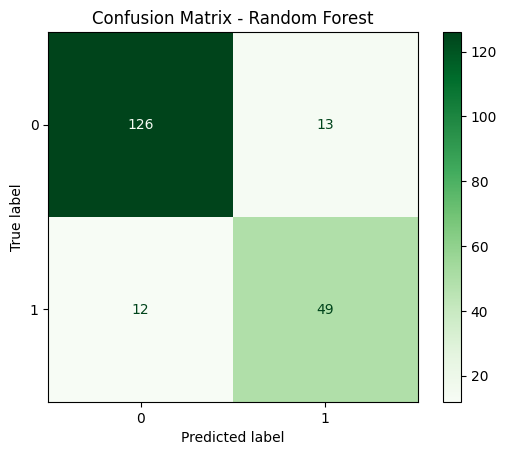

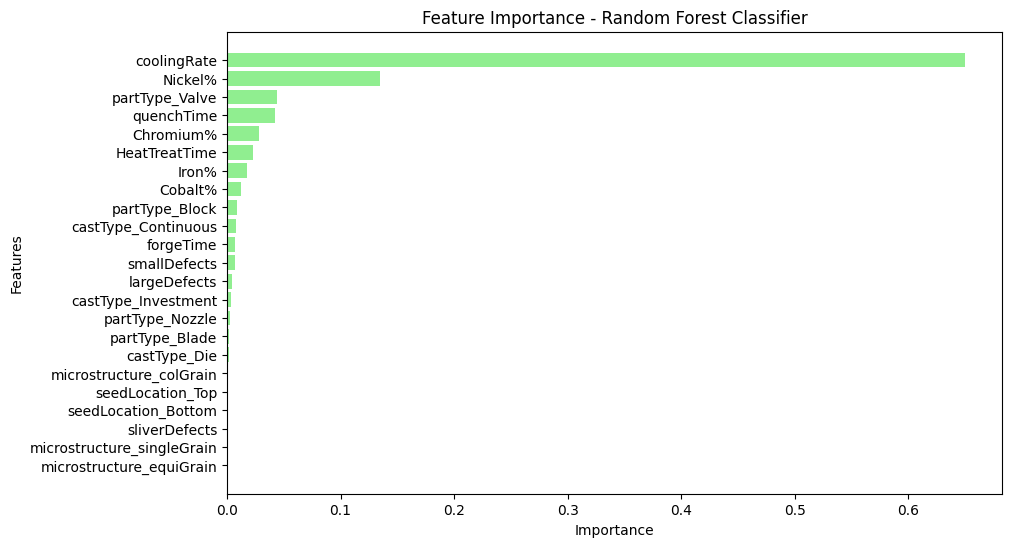

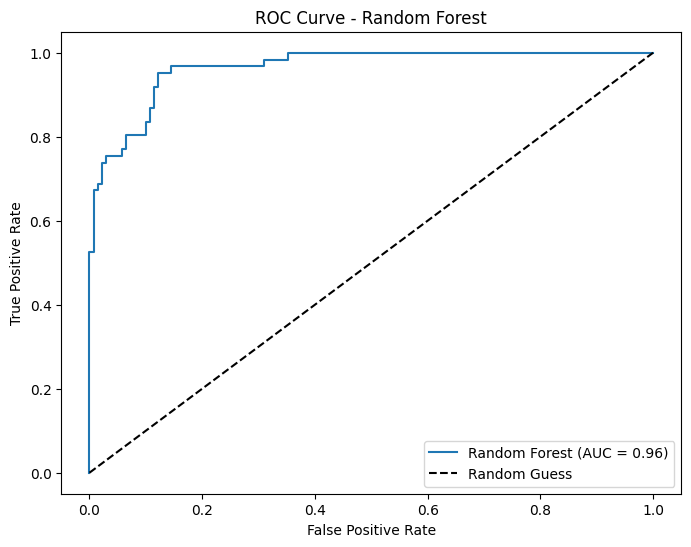

In [7]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

file_path = 'COMP1801_Coursework_Dataset.csv'
data = pd.read_csv(file_path)


data['1500_labels'] = (data['Lifespan'] > 1500).astype(int)


X = data.drop(columns=['Lifespan', '1500_labels'])
y = data['1500_labels']


numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


random_forest = RandomForestClassifier(random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__max_features': ['sqrt', 'log2', None]
}

rf_random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=rf_param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42
)

rf_random_search.fit(X_train, y_train)


best_rf_model = rf_random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)


print("\nRandom Forest Classifier:")
print("Best Parameters:", rf_random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


rf_feature_importances = best_rf_model.named_steps['classifier'].feature_importances_
feature_names = numerical_features + list(best_rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

y_pred_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_rf_proba)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()
